# Instructions


In this notebook, you will  practice all the classification algorithms that we have learned in this course.


Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics learned in the course.

We will use some of the algorithms taught in the course, specifically:

1. Linear Regression
2. KNN
3. Decision Trees
4. Logistic Regression
5. SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, you will use your models to generate the report at the end. 


# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)




This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



## **Import the required libraries**


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

In [5]:
await download(path, "Weather_Data.csv")
filename ="Weather_Data.csv"

In [6]:
df = pd.read_csv("Weather_Data.csv")

> Note: This version of the lab is designed for JupyterLite, which necessitates downloading the dataset to the interface. However, when working with the downloaded version of this notebook on your local machines (Jupyter Anaconda), you can simply **skip the steps above of "Importing the Dataset"** and use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv"
#df = pd.read_csv(filepath)

In [7]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing


#### One Hot Encoding


First, we need to perform one hot encoding to convert categorical variables to binary variables.


In [8]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [9]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [10]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [11]:
df_sydney_processed = df_sydney_processed.astype(float)

In [12]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)

Y = df_sydney_processed['RainTomorrow']

df_sydney_processed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,19.5,22.4,15.6,6.2,0.0,41.0,17.0,20.0,92.0,84.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,19.5,25.6,6.0,3.4,2.7,41.0,9.0,13.0,83.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.6,24.5,6.6,2.4,0.1,41.0,17.0,2.0,88.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.2,22.8,18.8,2.2,0.0,41.0,22.0,20.0,83.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.7,25.7,77.4,4.8,0.0,41.0,11.0,6.0,88.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Linear Regression


#### Q1) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [10]:
#Enter Your Code and Executex



In [13]:
x_train, x_test, Y_train, Y_test = train_test_split(features, Y, test_size=.2, random_state=10)
x_train.shape, x_test.shape, Y_train.shape, Y_test.shape

((2616, 66), (655, 66), (2616,), (655,))

#### Q2) Create and train a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [14]:
from sklearn.linear_model import LinearRegression
LinearReg = LinearRegression()
LinearReg.fit(x_train, Y_train)
print ('Coefficients: ', LinearReg.coef_)

Coefficients:  [-2.36883601e-02  1.30031554e-02  7.30154915e-04  6.49290860e-03
 -3.51614515e-02  4.23841910e-03  1.82843563e-03  7.89794445e-04
  9.55888360e-04  8.56007751e-03  7.70261345e-03 -9.24932344e-03
 -8.87528023e-03  1.00457553e-02  1.44651992e-02 -3.48325241e-03
  1.03190076e+10  1.03190076e+10 -4.35428535e+09 -4.35428535e+09
 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09
 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09
 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09 -4.35428535e+09
 -4.35428535e+09 -4.35428535e+09  4.72755310e+09  4.72755310e+09
  4.72755310e+09  4.72755310e+09  4.72755310e+09  4.72755310e+09
  4.72755310e+09  4.72755310e+09  4.72755310e+09  4.72755310e+09
  4.72755310e+09  4.72755310e+09  4.72755310e+09  4.72755310e+09
  4.72755310e+09  4.72755310e+09 -1.18315500e+10 -1.18315500e+10
 -1.18315500e+10 -1.18315500e+10 -1.18315500e+10 -1.18315500e+10
 -1.18315500e+10 -1.18315500e+10 -1.18315500e+10 -1.18315500e+10
 -1.183155

#### Q3) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [16]:
#Enter Your Code and Execute
import matplotlib.pyplot as plt
%matplotlib inline

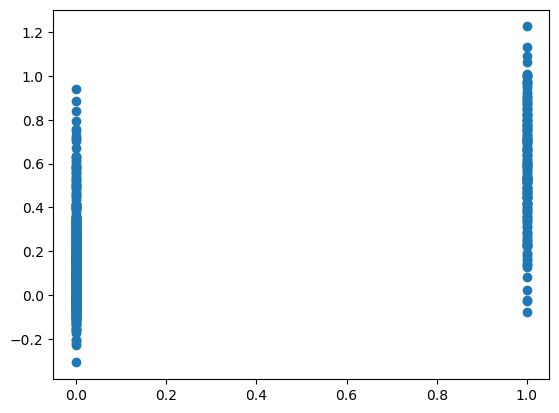

In [17]:
predictions = 0
predictions= LinearReg.predict(x_test)
plt.scatter(Y_test,predictions)

#### Q4) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [18]:
#Enter Your Code and Execute
from sklearn import metrics

In [19]:
LinearRegression_MAE = metrics.mean_absolute_error(Y_test,predictions)
LinearRegression_MSE = metrics.mean_squared_error(Y_test,predictions)
LinearRegression_R2 = np.sqrt(metrics.mean_squared_error(Y_test,predictions))
print("LinearRegression_MAE:",LinearRegression_MAE,"LinearRegression_MSE :",LinearRegression_MSE,"LinearRegression_R2 :",LinearRegression_R2)

LinearRegression_MAE: 0.256318933909176 LinearRegression_MSE : 0.1157209828234031 LinearRegression_R2 : 0.3401778693910042


#### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.


In [ ]:
#Enter Your Code and Execute

In [20]:
Report = {"Metrics":["MAE","MSE","R2"],"Result":[LinearRegression_MAE,LinearRegression_MSE,LinearRegression_R2]}
pd.DataFrame(Report)

,Metrics,Result
0,MAE,0.256319
1,MSE,0.115721
2,R2,0.340178


### KNN


#### Q6) Create and train a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `4`.


In [ ]:
#Enter Your Code and Execute

In [21]:
k=4
KNN =KNeighborsClassifier(n_neighbors=k).fit(x_train,Y_train)
KNN


KNeighborsClassifier(n_neighbors=4)

#### Q7) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code and Execute

In [22]:
predictions2 = KNN.predict(x_test)
predictions2[0:5]

array([0., 0., 1., 0., 0.])

#### Q8) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [ ]:
#Enter Your Code and Execute

In [25]:
KNN_Accuracy_Score = metrics.accuracy_score(Y_test,predictions2)
KNN_JaccardIndex = jaccard_score(Y_test,predictions2,pos_label=0)
KNN_F1_Score = f1_score(Y_test,predictions2,pos_label=1,average='binary')
Report2 = {"Metrics KNN":["Accuracy","JaccardIndex","F1Score"],"Result": 
[KNN_Accuracy_Score ,KNN_JaccardIndex,KNN_F1_Score]}
pd.DataFrame(Report2)

,Metrics KNN,Result
0,Accuracy,0.818321
1,JaccardIndex,0.790123
2,F1Score,0.596610


### Decision Tree


#### Q9) Create and train a Decision Tree model called Tree using the training data (`x_train`, `y_train`).


In [27]:
#Enter Your Code and Execute
from sklearn import tree

In [28]:
Tree = tree.DecisionTreeClassifier()
Tree= Tree.fit(x_train,Y_train)
Tree

DecisionTreeClassifier()

#### Q10) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code and Execute

In [29]:
predictions3 = Tree.predict(x_test)
predictions3

array([0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1.

#### Q11) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [ ]:
#Enter Your Code and Execute

In [31]:
Tree_Accuracy_Score = metrics.accuracy_score(Y_test,predictions3)
Tree_JaccardIndex = jaccard_score(Y_test,predictions3,pos_label=0)
Tree_F1_Score = f1_score(Y_test,predictions3,pos_label=1,average='binary')

Report3={"Metrics Tree":["Accuracy","JaccardIndex","F1Score"],"Result":[Tree_Accuracy_Score,Tree_JaccardIndex,Tree_F1_Score]}
pd.DataFrame(Report3)

,Metrics Tree,Result
0,Accuracy,0.766412
1,JaccardIndex,0.718750
2,F1Score,0.592000


### Logistic Regression


#### Q12) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.


In [ ]:
#Enter Your Code and Execute

In [32]:
x_train2, x_test2, Y_train2, Y_test2 = train_test_split(features, Y, test_size=.2, random_state=1)
x_train2.shape, x_test2.shape, Y_train2.shape, Y_test2.shape

((2616, 66), (655, 66), (2616,), (655,))

#### Q13) Create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.


In [ ]:
#Enter Your Code and Execute

In [33]:
LR = LogisticRegression(C=1.0,solver='liblinear').fit(x_train2,Y_train2)
print('Coefficient :',LR.coef_)

Coefficient : [[-0.18778865  0.02264536  0.0117116   0.00880982 -0.22546679  0.03567162
   0.01044671  0.00795829  0.02669392  0.05130884  0.0698229  -0.07765463
  -0.12461207  0.17789266  0.17080559  0.02548204 -0.15158752  0.18037037
   0.58064894 -1.03434926  0.39305477 -0.32181908 -0.28529076 -0.45642876
  -0.08203254 -0.02381021 -0.06584801  0.51150354  0.15536345  0.01510076
   0.1554734  -0.18164605  0.4641307   0.20473196  0.27307011  0.0664784
  -0.01280595 -0.09409953 -0.12576436  0.0847466  -0.03029529  0.27239883
  -0.29374095  0.01699025 -0.0121007  -0.13987448  0.16710282  0.00653095
   0.0371081  -0.18696196 -0.63069049 -0.55489134 -0.01940672 -0.43521445
  -0.35627569  0.31062589  0.17074402 -0.1744482   0.64807812  0.25487351
   0.02836966  0.70538643  0.32376695  0.127728   -0.47587887  0.10601603]]


#### Q14) Now, use the `predict` and `predict_proba` methods on the testing data (`x_test`) and save it as 2 arrays `predictions` and `predict_proba`.


In [ ]:
#Enter Your Code and Execute

In [35]:
predictions4= LR.predict(x_test2)
predictions4

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0.

In [ ]:
predict_proba = 

#### Q15) Using the `predictions`, `predict_proba` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [ ]:
#Enter Your Code and Execute

In [36]:
LR_Accuracy_Score = metrics.accuracy_score(Y_test2, predictions4)
LR_JaccardIndex = jaccard_score(Y_test2, predictions4,pos_label=0)
LR_F1_Score = f1_score(Y_test2, predictions4, pos_label=1, average='binary')
LR_Log_Loss = log_loss(Y_test2, predictions4)

Report4 = {"Metrics Logistic Regression":["Accuracy","JaccardIndex","F1Score","LogLoss"],"Result": 
[LR_Accuracy_Score ,LR_JaccardIndex, LR_F1_Score,LR_Log_Loss]}
pd.DataFrame(Report4)

,Metrics Logistic Regression,Result
0,Accuracy,0.838168
1,JaccardIndex,0.805147
2,F1Score,0.676829
3,LogLoss,5.833019


### SVM


#### Q16) Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).


In [37]:
#Enter Your Code and Execute
from sklearn import svm

In [38]:
SVM = svm.SVC(kernel='rbf')
SVM.fit(x_train2,Y_train2)

SVC()

#### Q17) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code and Execute

In [40]:
predictions5 = SVM.predict(x_test2)
predictions5 [0:5]

array([0., 0., 0., 0., 0.])

#### Q18) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [41]:
SVM_Accuracy_Score = metrics.accuracy_score(Y_test2,predictions5)
SVM_JaccardIndex = jaccard_score(Y_test2,predictions5,pos_label=0)
SVM_F1_Score = f1_score(Y_test2,predictions5,pos_label=1,average='binary')
Report5 = {"Metrics SVM":["Accuracy","JaccardIndex","F1Score"],"Result": 
[SVM_Accuracy_Score ,SVM_JaccardIndex, SVM_F1_Score]}
pd.DataFrame(Report5)

,Metrics SVM,Result
0,Accuracy,0.722137
1,JaccardIndex,0.722137
2,F1Score,0.000000


### Report


#### Q19) Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model


In [42]:
ReportFinal = {"Total Metrics SVM":["Accuracy","JaccardIndex","F1Score","LogLoss"],"Result Metrics KNN": 
[KNN_Accuracy_Score ,KNN_JaccardIndex,KNN_F1_Score,""],"Result Metrics Tree":[Tree_Accuracy_Score ,Tree_JaccardIndex,Tree_F1_Score,""], "Result Metrics Logistic Reg": [LR_Accuracy_Score ,LR_JaccardIndex, LR_F1_Score,LR_Log_Loss], "Results Metrics SVM":[SVM_Accuracy_Score ,SVM_JaccardIndex, SVM_F1_Score,""]}
pd.DataFrame(ReportFinal)

,Total Metrics SVM,Result Metrics KNN,Result Metrics Tree,Result Metrics Logistic Reg,Results Metrics SVM
0,Accuracy,0.818321,0.766412,0.838168,0.722137
1,JaccardIndex,0.790123,0.71875,0.805147,0.722137
2,F1Score,0.59661,0.592,0.676829,0.0
3,LogLoss,,,5.833019,


<h2 id="Section_5">  How to submit </h2>

<p>Once you complete your notebook you will have to share it. You can download the notebook by navigating to "File" and clicking on "Download" button.

<p>This will save the (.ipynb) file on your computer. Once saved, you can upload this file in the "My Submission" tab, of the "Peer-graded Assignment" section.  


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

### Other Contributors

[Svitlana Kramar](https://www.linkedin.com/in/svitlana-kramar/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01)


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description          |
| ----------------- | ------- | ------------- | --------------------------- |
| 2022-06-22        | 2.0     | Svitlana K.   | Deleted GridSearch and Mock |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
